In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/cauec/Documents/Career/COURSES/COURSERA_DataScience/Course_9_CapstoneProject/Data-Collisions.csv')
df.head()

C:\Users\cauec\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df = df[['SEVERITYCODE', 'UNDERINFL', 'VEHCOUNT', 'INCDTTM', 'PERSONCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND']]
df


,SEVERITYCODE,UNDERINFL,VEHCOUNT,INCDTTM,PERSONCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND
0,2,N,2,3/27/2013 2:54:00 PM,2,At Intersection (intersection related),Overcast,Wet
1,1,0,2,12/20/2006 6:55:00 PM,2,Mid-Block (not related to intersection),Raining,Wet
2,1,0,3,11/18/2004 10:20:00 AM,4,Mid-Block (not related to intersection),Overcast,Dry
3,1,N,3,3/29/2013 9:26:00 AM,3,Mid-Block (not related to intersection),Clear,Dry
4,2,0,2,1/28/2004 8:04:00 AM,2,At Intersection (intersection related),Raining,Wet
...,...,...,...,...,...,...,...,...
194668,2,N,2,11/12/2018 8:12:00 AM,3,Mid-Block (not related to intersection),Clear,Dry
194669,1,N,2,12/18/2018 9:14:00 AM,2,Mid-Block (not related to intersection),Raining,Wet
194670,2,N,2,1/19/2019 9:25:00 AM,3,At Intersection (intersection related),Clear,Dry
194671,2,N,1,1/15/2019 4:48:00 PM,2,At Intersection (intersection related),Clear,Dry


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   UNDERINFL     189789 non-null  object
 2   VEHCOUNT      194673 non-null  int64 
 3   INCDTTM       194673 non-null  object
 4   PERSONCOUNT   194673 non-null  int64 
 5   JUNCTIONTYPE  188344 non-null  object
 6   WEATHER       189592 non-null  object
 7   ROADCOND      189661 non-null  object
dtypes: int64(3), object(5)
memory usage: 11.9+ MB


In [5]:
# frequency of unique indexes for each attribute
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print("")

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

UNDERINFL
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

VEHCOUNT
2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

INCDTTM
11/2/2006                96
10/3/2008                91
11/5/2005                83
12/4/2004                74
6/1/2006                 73
                         ..
1/11/2015 11:30:00 AM     1
10/14/2004 2:00:00 AM     1
9/15/2008 6:30:00 AM      1
9/10/2013 2:21:00 AM      1
8/23/2013 7:35:00 PM      1
Name: INCDTTM, Length: 162058, dtype: int64

PERSONCOUNT
2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6

In [6]:
#missing values for each attribute
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64



### Filling 'UNDERINFL' constant

In [7]:
# fixing mixed labels into dummy values
df['UNDERINFL'].replace(['0','1'], ['N', 'Y'], inplace = True)
df['UNDERINFL'].replace(['N', 'Y'], [0,1],  inplace = True)

In [8]:
#Replace NaN for 0, the most frequent case
df["UNDERINFL"].replace(np.nan, 0, inplace=True)


In [9]:
df.isnull().UNDERINFL.value_counts()

False    194673
Name: UNDERINFL, dtype: int64

### WEATHER fill blanks

In [10]:
# find the proportion of each type to fill blanks accordingly
df_weather = pd.DataFrame(df['WEATHER'].value_counts())
df_weather.index.name = 'type'
df_weather.reset_index(inplace = True)

In [11]:
df_weather['%'] = (df_weather['WEATHER']/df_weather['WEATHER'].sum())*100
df_weather

,type,WEATHER,%
0,Clear,111135,58.617980
1,Raining,33145,17.482278
2,Overcast,27714,14.617705
3,Unknown,15091,7.959724
4,Snowing,907,0.478396
5,Other,832,0.438837
6,Fog/Smog/Smoke,569,0.300118
7,Sleet/Hail/Freezing Rain,113,0.059602
8,Blowing Sand/Dirt,56,0.029537
9,Severe Crosswind,25,0.013186


In [12]:
#Replace NaN for 0, the most frequent case
df["WEATHER"].replace(np.nan, 'Clear', inplace=True)


In [13]:
#replace unknown
df["WEATHER"].replace('Unknown', 'Clear', inplace=True)

In [14]:
df = df[df.WEATHER != 'Other']

In [15]:
df.isnull().WEATHER.value_counts()

False    193841
Name: WEATHER, dtype: int64

## ROADCOND fill blanks

In [16]:
# find the proportion of each type to fill blanks accordingly
df_road = pd.DataFrame(df['ROADCOND'].value_counts())
df_road.index.name = 'type'
df_road.reset_index(inplace = True)

In [17]:
df_road['%'] = (df_road['ROADCOND']/df_road['ROADCOND'].sum())*100
df_road

,type,ROADCOND,%
0,Dry,124322,65.837707
1,Wet,47409,25.106577
2,Unknown,14540,7.700007
3,Ice,1190,0.630193
4,Snow/Slush,996,0.527456
5,Other,122,0.064608
6,Standing Water,115,0.060901
7,Sand/Mud/Dirt,74,0.039188
8,Oil,63,0.033363


In [18]:
#Replace NaN for the most frequent case
df["ROADCOND"].replace(np.nan, 'Dry', inplace=True)

C:\Users\cauec\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
#Replace unknown
df["ROADCOND"].replace('Unknown', 'Dry', inplace=True)

In [20]:
# Drop 'other'
df = df[df.ROADCOND != 'Other']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193719 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEVERITYCODE  193719 non-null  int64  
 1   UNDERINFL     193719 non-null  float64
 2   VEHCOUNT      193719 non-null  int64  
 3   INCDTTM       193719 non-null  object 
 4   PERSONCOUNT   193719 non-null  int64  
 5   JUNCTIONTYPE  187474 non-null  object 
 6   WEATHER       193719 non-null  object 
 7   ROADCOND      193719 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 13.3+ MB


## JUNCTION TYPE

In [22]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [23]:
# simply drop whole row with NaN in "JUNCTIONTYPE" column
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)


In [24]:
#drop unknown
df = df[df.JUNCTIONTYPE != 'Unknown']

## Indicator variable (or dummy variable)

In [25]:
# dummies for WEATHER 
dummy_variable_1 = pd.get_dummies(df["WEATHER"])
dummy_variable_1.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [26]:
dummy_variable_1.rename(columns={'Blowing Sand/Dirt':'sandy', 'Fog/Smog/Smoke':'fog', 'Partly Cloudy': 'cloudy', 'Severe Crosswind': 'crosswind', 'Sleet/Hail/Freezing Rain': 'sleet'}, inplace=True)
dummy_variable_1.head()

,sandy,Clear,fog,Overcast,cloudy,Raining,crosswind,sleet,Snowing
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [27]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("WEATHER", axis = 1, inplace=True)

In [28]:
df.head()

,SEVERITYCODE,UNDERINFL,VEHCOUNT,INCDTTM,PERSONCOUNT,JUNCTIONTYPE,ROADCOND,sandy,Clear,fog,Overcast,cloudy,Raining,crosswind,sleet,Snowing
0,2,0.0,2,3/27/2013 2:54:00 PM,2,At Intersection (intersection related),Wet,0,0,0,1,0,0,0,0,0
1,1,0.0,2,12/20/2006 6:55:00 PM,2,Mid-Block (not related to intersection),Wet,0,0,0,0,0,1,0,0,0
2,1,0.0,3,11/18/2004 10:20:00 AM,4,Mid-Block (not related to intersection),Dry,0,0,0,1,0,0,0,0,0
3,1,0.0,3,3/29/2013 9:26:00 AM,3,Mid-Block (not related to intersection),Dry,0,1,0,0,0,0,0,0,0
4,2,0.0,2,1/28/2004 8:04:00 AM,2,At Intersection (intersection related),Wet,0,0,0,0,0,1,0,0,0


In [29]:
# dummies for ROADCOND 
dummy_variable_2 = pd.get_dummies(df["ROADCOND"])
dummy_variable_2.head()

,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [30]:
dummy_variable_2.rename(columns={'Sand/Mud/Dirt':'road_sand', 'Snow/Slush':'road_snow', 'Standing Water': 'road_pond', 'Dry': 'road_dry', 'Ice': 'road_ice', 'Oil':'road_oil', 'Wet': 'road_wet'}, inplace=True)
dummy_variable_2.head()

,road_dry,road_ice,road_oil,road_sand,road_snow,road_pond,road_wet
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [31]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('ROADCOND', axis = 1, inplace=True)

In [32]:
df.head()

,SEVERITYCODE,UNDERINFL,VEHCOUNT,INCDTTM,PERSONCOUNT,JUNCTIONTYPE,sandy,Clear,fog,Overcast,...,crosswind,sleet,Snowing,road_dry,road_ice,road_oil,road_sand,road_snow,road_pond,road_wet
0,2,0.0,2,3/27/2013 2:54:00 PM,2,At Intersection (intersection related),0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0.0,2,12/20/2006 6:55:00 PM,2,Mid-Block (not related to intersection),0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0.0,3,11/18/2004 10:20:00 AM,4,Mid-Block (not related to intersection),0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0.0,3,3/29/2013 9:26:00 AM,3,Mid-Block (not related to intersection),0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0.0,2,1/28/2004 8:04:00 AM,2,At Intersection (intersection related),0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df.isna().sum()

SEVERITYCODE    0
UNDERINFL       0
VEHCOUNT        0
INCDTTM         0
PERSONCOUNT     0
JUNCTIONTYPE    0
sandy           0
Clear           0
fog             0
Overcast        0
cloudy          0
Raining         0
crosswind       0
sleet           0
Snowing         0
road_dry        0
road_ice        0
road_oil        0
road_sand       0
road_snow       0
road_pond       0
road_wet        0
dtype: int64

In [34]:
#to date_time
df['INCDTTM'] = pd.to_datetime(df.INCDTTM)

In [35]:
#split INCDTTM into date and time into dif columns
df['DATE'] = [d.date() for d in df['INCDTTM']]
df['TIME'] = [d.time() for d in df['INCDTTM']]

In [36]:
df.drop('INCDTTM', axis = 1, inplace = True)

In [37]:
df.head()

,SEVERITYCODE,UNDERINFL,VEHCOUNT,PERSONCOUNT,JUNCTIONTYPE,sandy,Clear,fog,Overcast,cloudy,...,Snowing,road_dry,road_ice,road_oil,road_sand,road_snow,road_pond,road_wet,DATE,TIME
0,2,0.0,2,2,At Intersection (intersection related),0,0,0,1,0,...,0,0,0,0,0,0,0,1,2013-03-27,14:54:00
1,1,0.0,2,2,Mid-Block (not related to intersection),0,0,0,0,0,...,0,0,0,0,0,0,0,1,2006-12-20,18:55:00
2,1,0.0,3,4,Mid-Block (not related to intersection),0,0,0,1,0,...,0,1,0,0,0,0,0,0,2004-11-18,10:20:00
3,1,0.0,3,3,Mid-Block (not related to intersection),0,1,0,0,0,...,0,1,0,0,0,0,0,0,2013-03-29,09:26:00
4,2,0.0,2,2,At Intersection (intersection related),0,0,0,0,0,...,0,0,0,0,0,0,0,1,2004-01-28,08:04:00


In [38]:
# dummy values to daytime and nighttime

starthour = pd.to_datetime("06:00:00").time()
endhour = pd.to_datetime("19:00:00").time()

df['DAYTIME'] = np.where((df['TIME'] < endhour) & (df['TIME'] > starthour), 1, 0)
df['NIGHTTIME'] = np.where((df['TIME'] < endhour) & (df['TIME'] > starthour), 0, 1)



df.head()

,SEVERITYCODE,UNDERINFL,VEHCOUNT,PERSONCOUNT,JUNCTIONTYPE,sandy,Clear,fog,Overcast,cloudy,...,road_ice,road_oil,road_sand,road_snow,road_pond,road_wet,DATE,TIME,DAYTIME,NIGHTTIME
0,2,0.0,2,2,At Intersection (intersection related),0,0,0,1,0,...,0,0,0,0,0,1,2013-03-27,14:54:00,1,0
1,1,0.0,2,2,Mid-Block (not related to intersection),0,0,0,0,0,...,0,0,0,0,0,1,2006-12-20,18:55:00,1,0
2,1,0.0,3,4,Mid-Block (not related to intersection),0,0,0,1,0,...,0,0,0,0,0,0,2004-11-18,10:20:00,1,0
3,1,0.0,3,3,Mid-Block (not related to intersection),0,1,0,0,0,...,0,0,0,0,0,0,2013-03-29,09:26:00,1,0
4,2,0.0,2,2,At Intersection (intersection related),0,0,0,0,0,...,0,0,0,0,0,1,2004-01-28,08:04:00,1,0


In [39]:
df.drop('TIME', axis = 1, inplace = True)

In [40]:
df.drop('DATE', axis = 1, inplace = True)

In [41]:
# dummies for JUNCTIONTYPE
dummy_variable_4 = pd.get_dummies(df["JUNCTIONTYPE"])
dummy_variable_4.head()

,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [42]:
dummy_variable_4.rename(columns={'At Intersection (but not related to intersection)':'at_intersect_n', 'At Intersection (intersection related)':'at_intersect', 'Driveway Junction': 'Driveway', 'Mid-Block (but intersection related)': 'midblock', 'Mid-Block (not related to intersection)': 'midblock_n', 'Ramp Junction':'ramp'}, inplace=True)
dummy_variable_4.head()

,at_intersect_n,at_intersect,Driveway,midblock,midblock_n,ramp
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [43]:
df = pd.concat([df, dummy_variable_4], axis=1)
df.drop('JUNCTIONTYPE', axis = 1, inplace=True)

In [44]:

df.to_csv('Desktop')

In [45]:
# Last Feature Selection check
grouped_test2=df.groupby('SEVERITYCODE', as_index=False).sum()
transp = grouped_test2.T
transp['% severe'] = transp[0]/transp[1]
transp

,0,1,% severe
SEVERITYCODE,1.0,2.0,0.500000
UNDERINFL,5477.0,3533.0,1.550241
VEHCOUNT,252536.0,107788.0,2.342895
PERSONCOUNT,304777.0,156768.0,1.944128
sandy,37.0,12.0,3.083333
Clear,88475.0,37450.0,2.362483
fog,369.0,187.0,1.973262
Overcast,18530.0,8681.0,2.134547
cloudy,2.0,3.0,0.666667
Raining,21601.0,11097.0,1.946562


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B1D662588>]],
      dtype=object)

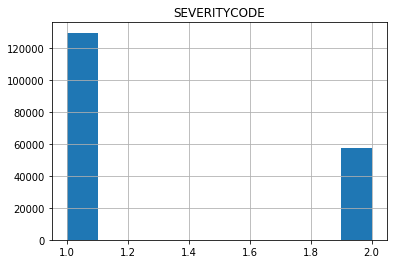

In [81]:
df.hist(column = 'SEVERITYCODE')

In [46]:
# Delete features with too few entries because they add no statistical value to the model and can hinder the results
df_test = df[['SEVERITYCODE', 'midblock_n', 'midblock', 'Driveway', 'at_intersect', 'at_intersect_n', 'NIGHTTIME', 'DAYTIME', 'road_wet', 'road_snow', 'road_dry', 'Snowing', 'Raining', 'Overcast', 'Clear', 'PERSONCOUNT',  'VEHCOUNT', 'UNDERINFL']]

# MODEL SELECTION

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [48]:
df_test.SEVERITYCODE.replace({1:0, 2: 1}, inplace = True)

C:\Users\cauec\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
X = np.asarray(df_test.drop('SEVERITYCODE', axis='columns'))
y = np.asarray(df_test.SEVERITYCODE)

In [50]:
# Data normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.95280981, -0.3713439 , -0.24509299,  1.41122016, -0.10618118,
        -0.79552284,  0.79552284,  1.73501863, -0.07238054, -1.678211  ,
        -0.06894957, -0.45964381,  2.42678995, -1.43046499, -0.33910632,
         0.12236059, -0.22469739],
       [ 1.0495274 , -0.3713439 , -0.24509299, -0.70860666, -0.10618118,
        -0.79552284,  0.79552284,  1.73501863, -0.07238054, -1.678211  ,
        -0.06894957,  2.17559768, -0.41206698, -1.43046499, -0.33910632,
         0.12236059, -0.22469739],
       [ 1.0495274 , -0.3713439 , -0.24509299, -0.70860666, -0.10618118,
        -0.79552284,  0.79552284, -0.57636269, -0.07238054,  0.59587263,
        -0.06894957, -0.45964381,  2.42678995, -1.43046499,  1.12878185,
         1.69283349, -0.22469739],
       [ 1.0495274 , -0.3713439 , -0.24509299, -0.70860666, -0.10618118,
        -0.79552284,  0.79552284, -0.57636269, -0.07238054,  0.59587263,
        -0.06894957, -0.45964381, -0.41206698,  0.69907338,  0.39483776,
         1.69283349

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [51]:
# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (149972, 17) (149972,)
Test set: (37493, 17) (37493,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [52]:
# Logistic regression return probabilities, which is the percentage we need for the answer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.82004068, 0.17995932],
       [0.74845505, 0.25154495],
       [0.58511583, 0.41488417],
       ...,
       [0.6510504 , 0.3489496 ],
       [0.79880749, 0.20119251],
       [0.58511583, 0.41488417]])

## Evaluation

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [55]:
# Jacard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\cauec\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7016243032032646

In [115]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 1497  9992]
 [ 1195 24809]]


Confusion matrix, without normalization
[[ 1497  9992]
 [ 1195 24809]]


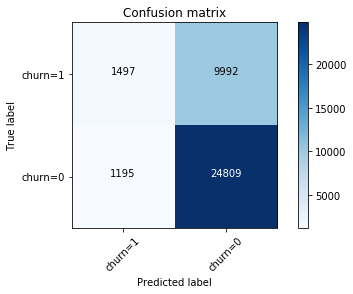

In [116]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [58]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82     26004
           1       0.56      0.13      0.21     11489

    accuracy                           0.70     37493
   macro avg       0.63      0.54      0.51     37493
weighted avg       0.66      0.70      0.63     37493



### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [98]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.577780045167771

# Results

In [117]:
#Creating scenarios for probabilities

snow_mid_n_night_noinf = np.array([1,0,0,0,0,1,0,0,1,0,1,0,0,0,2,2,0])
snow_mid_n_night_inf = np.array([1,0,0,0,0,1,0,0,1,0,1,0,0,0,2,2,1])
snow_mid_n_day_noinf = np.array([1,0,0,0,0,0,1,0,1,0,1,0,0,0,2,2,0])
snow_mid_n_day_inf = np.array([1,0,0,0,0,0,1,0,1,0,1,0,0,0,2,2,1])

rain_mid_n_night_noinf = np.array([1,0,0,0,0,1,0,1,0,0,0,1,0,0,2,2,0])
rain_mid_n_night_inf = np.array([1,0,0,0,0,1,0,1,0,0,0,1,0,0,2,2,1])
rain_mid_n_day_noinf = np.array([1,0,0,0,0,0,1,1,0,0,0,1,0,0,2,2,0])
rain_mid_n_day_inf = np.array([1,0,0,0,0,0,1,1,0,0,0,1,0,0,2,2,1])

dry_mid_n_night_noinf = np.array([1,0,0,0,0,1,0,0,0,1,0,0,0,1,2,2,0])
dry_mid_n_night_inf = np.array([1,0,0,0,0,1,0,0,0,1,0,0,0,1,2,2,1])
dry_mid_n_day_noinf = np.array([1,0,0,0,0,0,1,0,0,1,0,0,0,1,2,2,0])
dry_mid_n_day_inf = np.array([1,0,0,0,0,0,1,0,0,1,0,0,0,1,2,2,1])

result = snow_mid_n_night_noinf, snow_mid_n_night_inf, snow_mid_n_day_noinf, snow_mid_n_day_inf, rain_mid_n_night_noinf, rain_mid_n_night_inf, rain_mid_n_day_noinf,rain_mid_n_day_inf, dry_mid_n_night_noinf, dry_mid_n_night_inf, dry_mid_n_day_noinf, dry_mid_n_day_inf
   
for sit in result:    
    sit = sit.reshape(1, -1)
    print('sverity code is', LR.predict(sit)) 
    print('probability is', LR.predict_proba(sit))
    print('')
   

sverity code is [0]
probability is [[0.72 0.28]]

sverity code is [0]
probability is [[0.7 0.3]]

sverity code is [0]
probability is [[0.69 0.31]]

sverity code is [0]
probability is [[0.66 0.34]]

sverity code is [0]
probability is [[0.71 0.29]]

sverity code is [0]
probability is [[0.68 0.32]]

sverity code is [0]
probability is [[0.67 0.33]]

sverity code is [0]
probability is [[0.64 0.36]]

sverity code is [0]
probability is [[0.72 0.28]]

sverity code is [0]
probability is [[0.69 0.31]]

sverity code is [0]
probability is [[0.69 0.31]]

sverity code is [0]
probability is [[0.66 0.34]]

